In [ ]:
!pip install keras
!pip install keras.models
!pip install keras.layers.advanced_activations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ruta del directorio que contiene las imágenes
dataset_dir = 'resonancias_magneticas'

# Tamaño de las imágenes de entrada (en px)
input_shape = (500, 500)

# Cargar las imágenes y las etiquetas
X = []
y = []

for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = Image.open(image_path).convert('L')  # Cargar la imagen y convertirla a escala de grises
            image = image.resize(input_shape)
            image_array = np.array(image)
            X.append(image_array)
            y.append(label)

# Convertir las listas en matrices numpy
X = np.array(X)
y = np.array(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los valores de píxeles en el rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Crear un diccionario para asignar números a las clases
class_dict = {}
for i, label in enumerate(np.unique(y)):
    class_dict[label] = i

# Convertir las etiquetas a valores numéricos
y_train = np.array([class_dict[label] for label in y_train])
y_test = np.array([class_dict[label] for label in y_test])

# Convertir las etiquetas en codificación one-hot
num_classes = len(class_dict)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Crear el modelo de la CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
print("-------------------------------ETAPA DE ENTRENAMIENTO-------------------------------")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
print("-------------------------------TESTEO-------------------------------")
loss, accuracy = model.evaluate(X_test, y_test)

# Hacer predicciones con el modelo
print("-------------------------------PREDICCION-------------------------------")
predictions = model.predict(X_test)

-------------------------------ETAPA DE ENTRENAMIENTO-------------------------------
Epoch 1/10
2/2 [==============================] - 14s 4s/step - loss: 5.4732 - accuracy: 0.4750 - val_loss: 13.5872 - val_accuracy: 0.3636
Epoch 2/10
2/2 [==============================] - 12s 4s/step - loss: 8.7839 - accuracy: 0.5500 - val_loss: 0.1857 - val_accuracy: 0.8182
Epoch 3/10
2/2 [==============================] - 13s 4s/step - loss: 1.8464 - accuracy: 0.8250 - val_loss: 0.0798 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 13s 4s/step - loss: 1.2018 - accuracy: 0.8750 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 12s 4s/step - loss: 0.2714 - accuracy: 0.8750 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 12s 5s/step - loss: 0.1003 - accuracy: 0.9500 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 13s 5s/step - loss: 0.1059 - accurac

In [ ]:
# Comparacion de las predicciones obtenidas con el modelo

# Hacer predicciones con el modelo
predictions = model.predict(X_test)

# Obtener las etiquetas predichas para cada muestra
predicted_labels = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales para cada muestra
true_labels = np.argmax(y_test, axis=1)

# Comparar las etiquetas predichas con las etiquetas reales
for i in range(len(X_test)):
    print("Predicción: {} - Resultado: {}".format(predicted_labels[i], true_labels[i]))

1/1 [==============================] - 1s 1s/step
Predicción: 0 - Resultado: 0
Predicción: 0 - Resultado: 0
Predicción: 0 - Resultado: 0
Predicción: 1 - Resultado: 1
Predicción: 0 - Resultado: 0
Predicción: 0 - Resultado: 0
Predicción: 1 - Resultado: 1
Predicción: 0 - Resultado: 0
Predicción: 1 - Resultado: 1
Predicción: 0 - Resultado: 0
Predicción: 1 - Resultado: 1


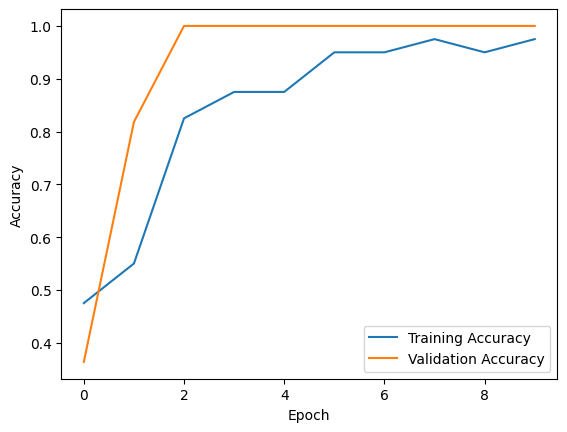

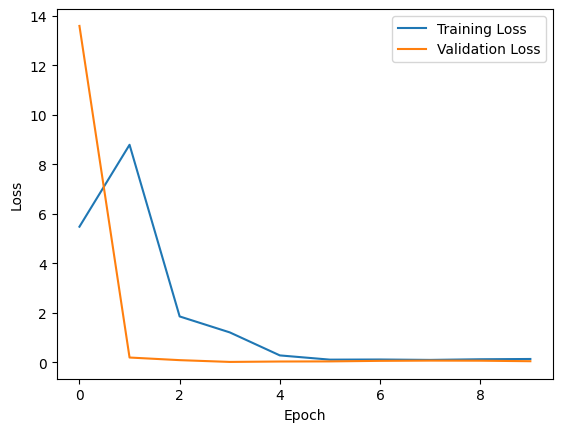

In [ ]:
# Analisis grafico y matematico del progreso del modelo de la red neuronal convolucional

# Obtener los valores de precisión y pérdida
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la precisión
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()